$$\renewcommand{\sD}{\mathcal{D}}
\renewcommand{\RR}{\mathbb{R}}
\renewcommand{\ZZ}{\mathbb{Z}}$$
# “On Characterizing the Capacity of Neural Networks Using Algebraic Topology”

<cite data-cite="6503695/6JPMHH53"></cite>

- Colton Grainger
- PhD Student, Mathematics, CU Boulder
- repository: `github.com/coltongrainger/fy19soml`

<!---
- introduce myself
- get oriented
    - how well am I prepared to understand and comment on Guss's paper?
    - what coursework would benefit me sooner than later?
    - how are my peers and the faculty involved?
- lay out a direction for future research
    - why is computational topology relevant to me?
        - it's at the intersection of pure math, applied math, cs
        - I'm generally inspired by Nikki's work
- make an *argument*
- reference software
    - ripser
    - TDAstats
--->

This talk: <span style="color:blue">**fully connected feed-forward networks.**</span>
![](2019-daniely.png)
Free parameters: <span style="color:blue">**depth**</span> $\ell$ (for *layers*) and <span style="color:red">**width**</span> $w$ (or sometimes $h$ for *hidden units*).


# problem: model selection
### key idea: consider homological complexity
### results: topological phase transitions

<img src="2010-hyndman.png" style="width: 1400px"/>

(Rob Hyndman, CC-BY-3.0, https://stats.stackexchange.com/q/181)

###  plausible approaches <cite data-cite="6503695/CIL5D5BD"></cite>

- trial and error
- heuristic search
    - *scalable?*
- exhaustive search
    - *computationally feasible?*

### example: heuristic search <cite data-cite="6503695/SVFFTWZW"></cite>

(Informally) Is there a function $g \colon \RR^d \to \RR$ that

- **is expressible** by a network with $\ell$-layers and $w$ neurons per layer,
- **yet cannot be well-approximated** by any network with $\tilde{\ell} < \ell$ layers, unless the width $\tilde{w}$ is allowed to be very large?

Such a function is said to give a *depth separation*.

<!---
are such functions dense in the space of data sets? likely...
--->

> There are $3$-layer networks of width $w \in O(d^k)$ polynomial in the dimension $d$ that cannot be arbitrarily well approximated by $2$-layer networks, unless the $2$-layer networks have width $\tilde{w} \in O(k^d)$ exponential in $d$. <cite data-cite="6503695/SVFFTWZW"></cite>

![](2016-eldan.png)


### example: exhaustive search <cite data-cite="6503695/6JPMHH53"></cite>

For each $\ell \in \{1, \ldots, 6\}$ and $h_0 \in \{1,\ldots, 500\}$, (we assume deeper layers are of fixed width, i.e., $h_1, \ldots, h_\ell = \beta_0(\mathcal{D})$), take
<!---
from which set of numbers? sheesh, this is mess.
- depth, *number of hidden layers*, $\ell$
- width, *hidden units per layer*, $w$   $\Leftrightarrow$ *number of hidden units*, $h_i$
--->
- fully connected architectures of $(\ell, h_i)$ layers and hidden units in the first hidden layer,
    - with unit weights initialized to samples from a normal distribution $\mathcal{N}(0, 1/\beta_0(\mathcal{D}))$,
    - and rectified linear (ReLu) activation functions.
![](2016-guss.png) image: <cite data-cite="6503695/GPGK7HG7"></cite>

To train architecture $(\ell, h_i)$

- for each of $930$ synthetic data distributions 
<!---
denoted $(\ZZ^1, \{0\})$ continguously up to $(\ZZ^{30}, \ZZ^{30})$,
omg this looks like it's going to take *forever*
--->
    - take $100$ initialized instances of the architecture $(\ell, h_i)$
    - sample the synthetic distribution 
    - optimize against cross-entropy loss, using the Adam optimizer, a fixed learning rate, and increasing batch size. 

![](2018-guss-datasets.png)
image: <cite data-cite="6503695/6JPMHH53"></cite>

<!---
wtf is the difference here?
https://machinelearning.subwiki.org/wiki/Hyperparameter_optimization
https://machinelearning.subwiki.org/wiki/Model_class_selection
https://machinelearning.subwiki.org/wiki/Cost_function
--->

### how to justify our choice of synthetic distributions?
### how to measure the error? 
### why is this an example?


### ~~main problem: model selection~~
# key idea: consider homological complexity
### results: topological phase transitions

![](2017-hicks-transit-map.png)
image: <cite data-cite="6503695/QZQ8L3PY"></cite>

![](2017-hicks-transit-map-zoom.png)
image: <cite data-cite="6503695/QZQ8L3PY"></cite>

## homology

> In its most primal manifestation, the homology of a space $X$ returns a sequence of vector spaces $H_\circ(X)$, the dimensions of which count various types of linearly independent holes in $X$. <cite data-cite="6503695/29DHXJ9A"></cite>

$$\text{torus} \quad \xrightarrow{H_\circ}\quad \begin{pmatrix}\mathbf{Z}^1\\ \mathbf{Z}^2\\ \mathbf{Z}^1\\ \vdots\end{pmatrix}$$

### it's combinatorial!

[![](2009-erickson.png)](http://jeffe.cs.illinois.edu/teaching/comptop/2009/notes/cell-complexes.pdf)

### approximate the space $X$ with a simplicial complex

[![](2009-erickson-vietoris.png)](http://jeffe.cs.illinois.edu/teaching/comptop/2009/notes/cell-complex-examples.pdf)

*(Erickson 2009)*

### a simplicial complex defines a chain complex of groups

- begin with a chain group $\mathsf{C}_p$, whose elements are formal sums of the $p$-dimensional cells
    - akin to vector spaces, sums of basis vectors
- the boundary homomorphism $\delta_p \colon \mathsf{C}_p \to \mathsf{C}_{p-1}$ maps each $p$-chain to the sum of the $p-1$ dimensional faces of its $p$-cells
- for an $n$ dimensional simplicial complex $X$, we have a sequence of homomorphisms linking the chain groups, called the *chain complex* $$0 \xrightarrow{\delta_{n+1}} \mathsf{C}_{n} \xrightarrow{\delta_{n}} \mathsf{C}_{n-1} \xrightarrow{\delta_{n-1}} \cdots \xrightarrow{\delta_{2}} \mathsf{C}_{1} \xrightarrow{\delta_{1}} \mathsf{C}_0 \xrightarrow{\delta_{0}} 0.$$
<cite data-cite="6503695/QKXWDQXG"></cite>


The kernels and the images of the boundary homomorphisms are the *cycle* and *boundary groups*. 

- a $p$-cycle is a $p$-chain $\alpha$ such that $\delta_p \alpha = 0$
- a $p$-boundary is a $p$-chain $\alpha$ such that $\delta_{p+1} \beta = \alpha$ for some $(k+1)$-chain $\beta$

We say two $p$-cycles are *homologous* if they differ by a boundary. (E.g., the red $1$-cycles below are homologous.)

![](torus.png)
<cite data-cite="6503695/RL6BKZK2"></cite>

### Betti numbers

- The $p^{th}$ **homology group** $H_p(X)$ is the abelian group of $p$-cycles modulo boundaries. 
- Usually coeffecients of the chain groups are from $\{0,1\}$, so $H_p = \{0,1\}^{\beta_p}$ is a vector space over $\{0,1\}$ of dimension $\beta_p$, where $\beta_p(X) = \mathrm{rank}\ \, H_p$ is the $p^{th}$ **Betti number.**

### finite topological invariants

- $\beta_0$ is the number of connected components, 
- $\beta_1$ the number of "holes or tunnels", 
- $\beta_2$ the number of "voids"

![](2014-morozov.gif)
<cite data-cite="6503695/Q8G9H7CX"></cite>

### TDA workflow: point cloud $\to$ nested complexes $\to$ persistence module $\to$ barcode

## "eye-squinting" (scale-free)

We need a *filtration* of a simplicial complex, so take *nested complexes*: $$K_1 \subseteq K_2 \subseteq \ldots \subseteq K_n$$

![](2014-morozov-dna.gif)
<cite data-cite="6503695/Q8G9H7CX"></cite>

### filtrations create nested complexes

- $K_1 \subseteq K_2 \subseteq \ldots \subseteq K_n$, without loss of generality, $K_{i+1} = K_i + \sigma_i$. 
    - Just an *ordering* of simplices. <cite data-cite="6503695/Q8G9H7CX"></cite>

```
simplices = [([0], 1), ([1], 2), ([0,1], 3), ([2], 4), ([1,2], 5), ([0,2], 6)]
f = Filtration()
for vertices, time in simplices:
    f.append(Simplex(vertices, time))
```

![](2014-morozov-simplices-plain.png)


### persistence of a homology class: the length of the interval that supports it

![](2014-morozov-simplices.png)
<cite data-cite="6503695/Q8G9H7CX"></cite>

### barcodes: how homology classes persist over time

![](2015-topaz.png)
<cite data-cite="6503695/5N568MB7"></cite>

In [16]:
# load R wrapper for Ripser
library("TDAstats", "dplyr", "cowplot", "ggplot2")

## random numbers
angles <- runif(100, 0, 2 * pi)
azimuthal <- runif(100, 0, pi)
interval <- runif(300, -1, 1)

## point clouds
S2 <- cbind(cos(angles)*sin(azimuthal), sin(angles)*sin(azimuthal), cos(azimuthal))
I3 <- matrix(interval, nrow = 100, byrow = TRUE)

# compute persistence module from Vietoris-Rips filtration
S2.hom <- calculate_homology(S2, dim = 2) 
I3.hom <- calculate_homology(unif3d, dim = 2)

# persistence barcodes to plot, scaled
pI3 <- plot_barcode(I3.hom) +  ggtitle("within unit 3-cube")  + xlim(c(0, 1.5))
pS2 <- plot_barcode(S2.hom) +  ggtitle("on unit 2-sphere")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


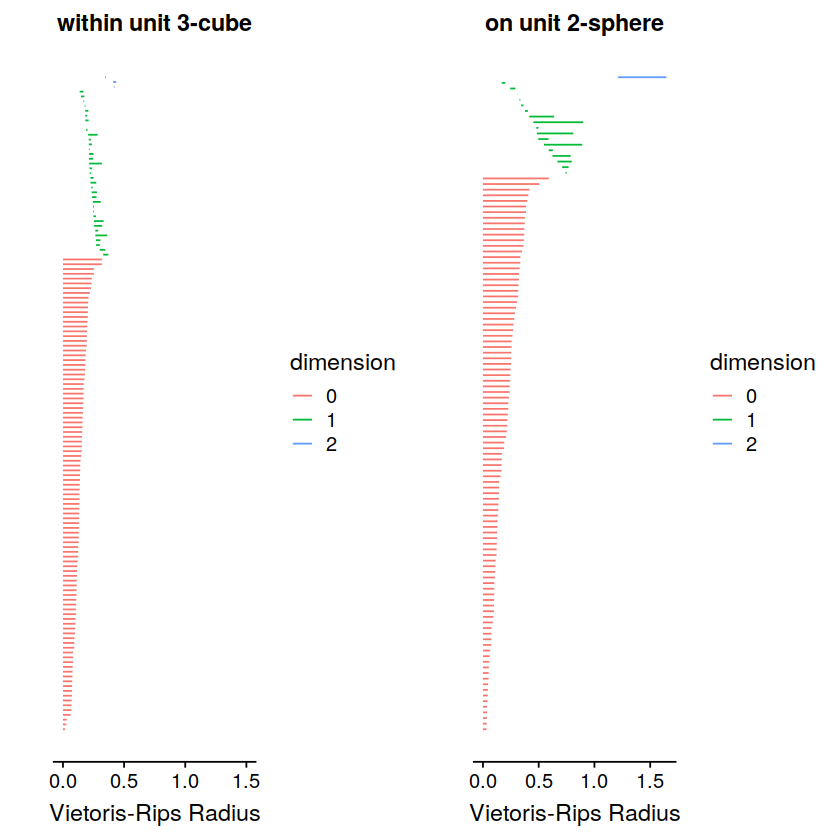

In [17]:
plot_grid(pI3, pS2)

In [18]:
# load phoneme dataset
phonemes <- read.table("https://www.openml.org/data/get_csv/1592281/php8Mz7BG", header=TRUE, sep=",")
str(phonemes)

'data.frame':	5404 obs. of  6 variables:
 $ V1   : num  0.49 -0.641 0.871 -0.628 -0.596 ...
 $ V2   : num  -0.4515 0.1092 -0.4599 -0.3163 0.0159 ...
 $ V3   : num  -1.048 0.292 0.578 1.934 2.043 ...
 $ V4   : num  -0.599 -0.917 0.807 -1.427 -1.688 ...
 $ V5   : num  -0.0204 0.2402 0.8352 -0.1366 -0.9481 ...
 $ Class: int  1 1 1 1 1 1 1 1 1 2 ...


In [19]:
# split "training" phonemes by labels (nasal vs oral)
phon1 <- filter(phonemes, Class == 1)
phon2 <- filter(phonemes, Class == 2)
data1 <- as.matrix(phon1[1:5]); colnames(data1) <- NULL
data2 <- as.matrix(phon2[1:5]); colnames(data2) <- NULL

# compute persistence modules & plot
phon1.hom <- calculate_homology(head(data1, 1000), dim = 1)
phon2.hom <- calculate_homology(head(data2, 1000), dim = 1)
nasal <- plot_barcode(phon1.hom) + ggtitle("Nasal Phonemes")
oral <- plot_barcode(phon2.hom) + ggtitle("Oral Phonemes")

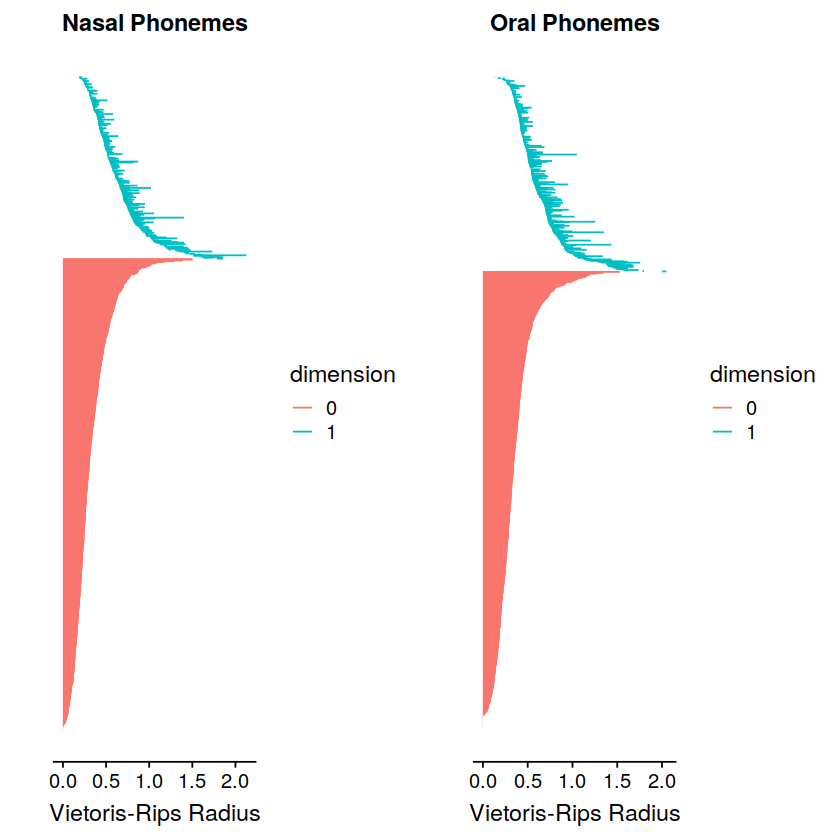

In [5]:
plot_grid(nasal, oral)

### in Guss 2018, for *model selection*, not *feature selection*

Persistent homology is

- a *summary* statistic,
- not (always) an enlightening *feature* of dataset


### ~~main problem: model selection~~
### ~~key idea: consider homological complexity~~
# results: topological phase transitions

### Summary

> Choosing an architecture whose homological complexity matches that of the dataset, generalizes well. 
>
> <cite data-cite="6503695/2IB9R6ZD"></cite>

### Software

- [`ripser`](https://github.com/Ripser/ripser) <cite data-cite="6503695/QNHSP73F"></cite>
- [`TDAstats`](https://doi.org/10.21105/joss.00860) <cite data-cite="6503695/GMEJZPXK"></cite>



### References

<div class="cite2c-biblio"></div>